# HH wake deficit comparisons

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib.lines import Line2D

In [2]:
# Put the list of all cases in here
cases = [
    # AMR-Wind data defs
    {'label':'AMR-Wind',
     'datadir':'../AMR.5kmX5km_turbine1/post_processing/data',
     'prefix':'AMRWIND',
     'linestyle':{'linestyle':'-'},
    },
    
    # FLORIS data defs
    {'label':'FLORIS',
     'datadir':'../FLORIS_turbine1/data',
     'prefix':'FLORIS',
     'linestyle':{'linestyle':'--'},
    },
    
]

In [3]:
def makelegend(caselist, xtarget, figsize=(8,0.75), fontsize=10):
    # Add Legend
    legfig, legax = plt.subplots(1, 1, figsize=figsize, dpi=125, sharey=True)
    legax.axis('off')
    legfontsize=fontsize
    caselines = [Line2D([0],[0], color='gray', **case['linestyle']) for  case in caselist]
    caselabels = [case['label'] for case in caselist]
    legend1 = plt.legend(caselines, 
                         caselabels, 
                         fontsize=legfontsize, frameon=False, loc='upper center', ncol=len(caselabels))
    legax.add_artist(legend1)

    cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    caselines = [Line2D([0],[0], color=cycle[i]) for i in range(len(xtarget)) ]
    caselabels = ['x/D=%0.1f'%x for x in xtarget]
    legend2 = plt.legend(caselines, 
                         caselabels, 
                         fontsize=legfontsize, frameon=False, loc='lower center', ncol=len(caselabels))
    legax.add_artist(legend2)
    return

Text(0, 0.5, 'U [m/s]')

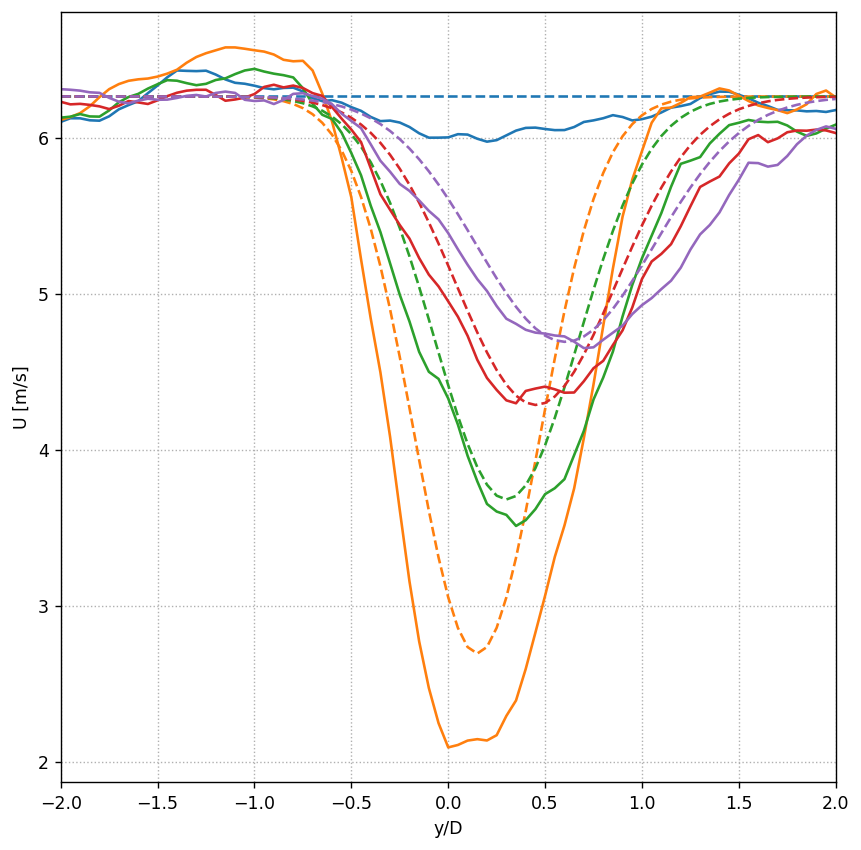

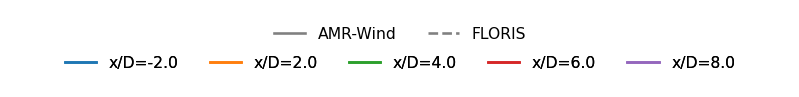

In [4]:
fig, ax = plt.subplots(1,1, figsize=(8,8), dpi=125)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

xtarget=[-2, 2,4,6,8]
for ix, xD in enumerate(xtarget):
    for icase, case in enumerate(cases):
        label   = case['label']
        prefix  = case['prefix']
        datadir = case['datadir']
        lstyle  = case['linestyle']
        fname   = f'{prefix}_HH_VEL_PROFILE_x_{xD:06.2f}D.dat'
        dat=np.loadtxt(datadir+'/'+fname)
        ax.plot(dat[:,0], dat[:,1], color=cycle[ix], **lstyle)

makelegend(cases, xtarget, fontsize=9)
ax.set_xlim([-2,2])
ax.grid(ls=':')
ax.set_xlabel('y/D')
ax.set_ylabel('U [m/s]')